### FiveThirtyEight Fandango Movie Ratings Analysis

This analysis looks at the descrepancies between fandango's user ratings and their displayed ratings. See more here:

https://fivethirtyeight.com/features/fandango-movies-ratings/

Data can be found here:
1. https://github.com/fivethirtyeight/data/blob/master/fandango/fandango_score_comparison.csv
2. https://github.com/mircealex/Movie_ratings_2016_17/blob/master/movie_ratings_16_17.csv

Goal is to determine whether there has been any change in Fandango's rating system after 538's analysis.

In [1]:
# import dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# read in the two csv files
before_score_comparison = pd.read_csv("fandango_score_comparison.csv")
after_movie_ratings_16_17 = pd.read_csv("movie_ratings_16_17.csv")

In [3]:
before_ratings_data_list = ['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']
after_analysis_data_list = ['movie', 'year', 'fandango']

In [4]:
before_data_used = before_score_comparison[before_ratings_data_list]

In [5]:
after_data_used = after_movie_ratings_16_17[after_analysis_data_list]

In [6]:
before_data_used.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5


In [7]:
after_data_used.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0


In [8]:
before_data_used['Fandango_Stars'].describe()

count    146.000000
mean       4.089041
std        0.540386
min        3.000000
25%        3.500000
50%        4.000000
75%        4.500000
max        5.000000
Name: Fandango_Stars, dtype: float64

Seems odd that min star is 3 and that the mean is 4

In [9]:
before_data_used['Fandango_Stars'].value_counts()

4.5    55
4.0    41
3.5    27
3.0    12
5.0    11
Name: Fandango_Stars, dtype: int64

In [10]:
after_data_used.columns

Index(['movie', 'year', 'fandango'], dtype='object')

In [11]:
after_data_used['year'].value_counts()

2016    191
2017     23
Name: year, dtype: int64

In [12]:
before_data_used.columns

Index(['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes',
       'Fandango_Difference'],
      dtype='object')

In [13]:
after_movie_ratings_16_17.columns

Index(['movie', 'year', 'metascore', 'imdb', 'tmeter', 'audience', 'fandango',
       'n_metascore', 'n_imdb', 'n_tmeter', 'n_audience', 'nr_metascore',
       'nr_imdb', 'nr_tmeter', 'nr_audience'],
      dtype='object')

In [14]:
after_movie_ratings_16_17['audience'].describe()

count    214.000000
mean      58.626168
std       21.100040
min       11.000000
25%       43.250000
50%       60.500000
75%       76.750000
max       93.000000
Name: audience, dtype: float64

In [15]:
before_score_comparison['Fandango_votes'].describe()

count      146.000000
mean      3848.787671
std       6357.778617
min         35.000000
25%        222.250000
50%       1446.000000
75%       4439.500000
max      34846.000000
Name: Fandango_votes, dtype: float64

In [16]:
after_data_used.sample(10, random_state = 1)

,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


In [17]:
# check the number of votes, any less than 30?

sum(before_data_used['Fandango_votes'] < 30)

0

In [18]:
# in the before data, the years the movies were released are in the FILM column, as such we need to extract the year
before_data_used['Year'] = before_data_used['FILM'].str[-5:-1]
before_data_used.head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,Year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015
2,Ant-Man (2015),5.0,4.5,12055,0.5,2015
3,Do You Believe? (2015),5.0,4.5,1793,0.5,2015
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5,2015


In [19]:
before_data_used['Year'].value_counts()

2015    129
2014     17
Name: Year, dtype: int64

In [20]:
after_data_used['year'].value_counts()

2016    191
2017     23
Name: year, dtype: int64

In [21]:
before_data_used['Year'] = before_data_used['Year'].astype(int)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [22]:
before_data_used.columns

Index(['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes',
       'Fandango_Difference', 'Year'],
      dtype='object')

In [23]:
before_data_used.dtypes

FILM                     object
Fandango_Stars          float64
Fandango_Ratingvalue    float64
Fandango_votes            int64
Fandango_Difference     float64
Year                      int64
dtype: object

In [24]:
before_2015 = before_data_used[before_data_used['Year'] == 2015]
after_2016 = after_data_used[after_data_used['year'] == 2016]

In [25]:
after_2016.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
4,A Hologram for the King,2016,3.0
5,A Monster Calls,2016,4.0


In [26]:
before_2015.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,Year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015
2,Ant-Man (2015),5.0,4.5,12055,0.5,2015
3,Do You Believe? (2015),5.0,4.5,1793,0.5,2015
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5,2015


In [27]:
before_2015.dtypes

FILM                     object
Fandango_Stars          float64
Fandango_Ratingvalue    float64
Fandango_votes            int64
Fandango_Difference     float64
Year                      int64
dtype: object

In [28]:
after_2016.dtypes

movie        object
year          int64
fandango    float64
dtype: object

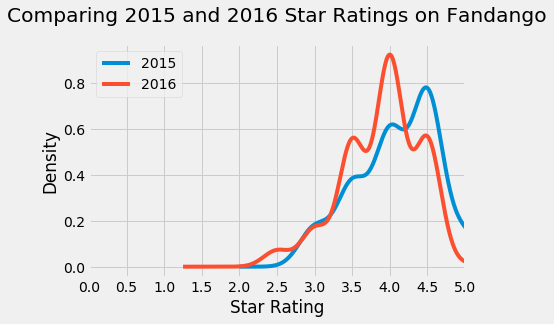

In [29]:
plt.style.use('fivethirtyeight')
before_2015['Fandango_Stars'].plot.kde(label='2015', legend=True)
after_2016['fandango'].plot.kde(label='2016', legend=True)

plt.title("Comparing 2015 and 2016 Star Ratings on Fandango", y=1.07)
plt.xlabel("Star Rating")
plt.xlim(0,5)
plt.xticks([0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])
plt.show()

Looks like the star ratings for movies that have greater than 30 reviews was higher in 2016 than in 2015

In [30]:
before_2015.columns

Index(['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes',
       'Fandango_Difference', 'Year'],
      dtype='object')

In [31]:
before_2015['Fandango_Stars'].describe()

count    129.000000
mean       4.085271
std        0.538096
min        3.000000
25%        3.500000
50%        4.000000
75%        4.500000
max        5.000000
Name: Fandango_Stars, dtype: float64

In [32]:
after_2016.columns

Index(['movie', 'year', 'fandango'], dtype='object')

In [33]:
after_2016['fandango'].describe()

count    191.000000
mean       3.887435
std        0.509540
min        2.500000
25%        3.500000
50%        4.000000
75%        4.250000
max        5.000000
Name: fandango, dtype: float64

In [43]:
mean = int(before_2015['Fandango_Stars'].mean())
median = int(before_2015['Fandango_Stars'].median())
mode = int(before_2015['Fandango_Stars'].mode())

In [50]:
#need to compute the summary statistics for each year

#2015
mean_2015 = before_2015['Fandango_Stars'].mean()
median_2015 = before_2015['Fandango_Stars'].median()
mode_2015 = before_2015['Fandango_Stars'].mode()[0]

#2016
mean_2016 = after_2016['fandango'].mean()
median_2016 = after_2016['fandango'].median()
mode_2016 = after_2016['fandango'].mode()[0]

summary_table = pd.DataFrame()

In [51]:
summary_table['2015'] = [mean_2015, median_2015, mode_2015]
summary_table['2016'] = [mean_2016, median_2016, median_2016]
summary_table.index = ['mean', 'median', 'mode']
summary_table.head()

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


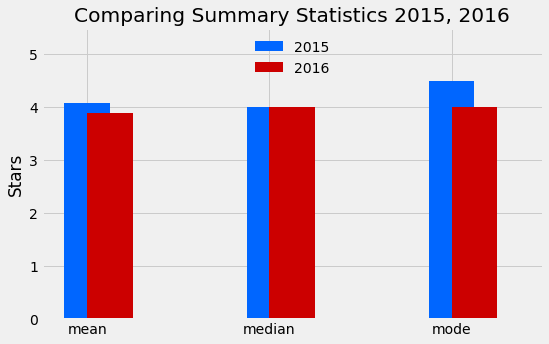

In [73]:
plt.style.use('fivethirtyeight')
summary_table['2015'].plot.bar(align='center', color='#0066FF', label = '2015', width=0.25)
summary_table['2016'].plot.bar(align='edge', color ='#CC0000', label = '2016', width=0.25, figsize=(8,5), rot=0)

plt.title("Comparing Summary Statistics 2015, 2016")
plt.ylim(0,5.5)
plt.ylabel('Stars')
plt.legend(framealpha=0,loc='upper center')
plt.show()